Notebook for Lecture 15 demo of kernel interpolation for a synthetic data set. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define function to be interpolated 

def f(x):

  val = np.exp( - x**2/0.05 )*np.cos(np.pi*20*x) + 0.5*np.tanh(5*(x - 0.5))

  return val

Text(0, 0.5, 'f(x)')

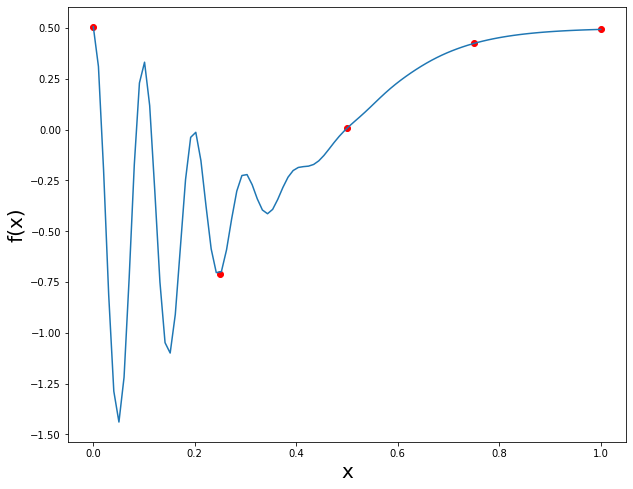

In [3]:
N = 100
N_p = 5

x = np.linspace(0,1, N) # grid used for plotting  

x_p = np.linspace(0,1, N_p) # set of points for interpolation

# plot the function 

fig,ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(x, f(x))
ax.scatter(x_p, f(x_p), color='r')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)

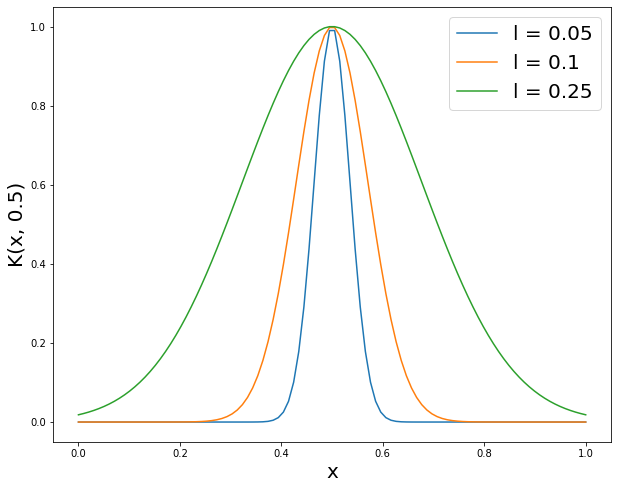

In [4]:
# define the kernel we wish to use 

def K(x1, x2, l):

  val = np.exp( - (np.abs(x1 - x2)**2)/(l**2) )

  return val


# plot K(x, 0.5) for illustration 

l = [0.05, 0.1, 0.25]

fig,ax = plt.subplots(1,1, figsize=(10,8))

for i in range(3):
  
  ax.plot(x, K(x, 0.5, l[i]), label='l = '+str(l[i]))

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('K(x, 0.5)', fontsize=20)
plt.legend(fontsize=20)

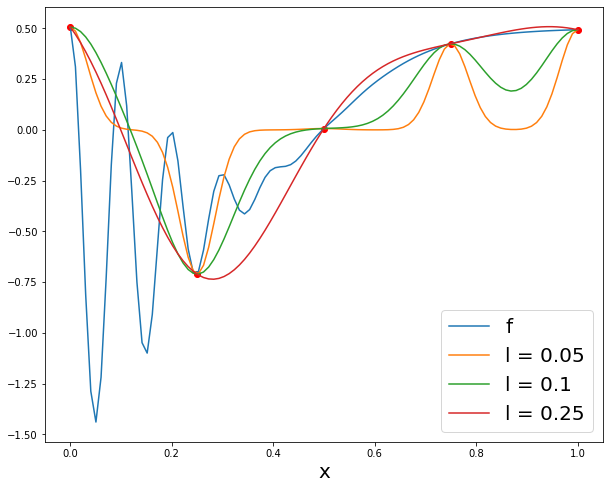

In [17]:
# compute kernel interpolands and plot them for each choice of l

# construct y vector, just for uniform notation with notes
y = f(x_p)

Theta = np.zeros( (N_p, N_p) )

fig,ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(x, f(x), label='f')

for i in range(3):
  # construct kernel matrix (maybe not the most efficient way but ok)
  for j in range(N_p):
    Theta[j,:] = K( x_p[j], x_p, l[i] )

  # compute kernel interpolant 

  a = np.linalg.solve(Theta, y)

  # plot the interpolant along with original function and interpolation data

  KV = np.zeros( (N_p, N) )

  for j in range(N_p):
    KV[j, :] = K( x_p[j], x, l[i] )

  f_interp = np.dot(a, KV)

  ax.plot(x, f_interp, label='l = ' + str(l[i]))


ax.scatter(x_p, y, color='r' )

ax.set_xlabel('x', fontsize=20)
plt.legend(fontsize=20)



